# Project 1 - Large-scale Data Cleaning, Encoding, Exploration, and Predictive Modeling

---

## Project Description

In this project, you will work with the NYC Yellow Taxi Dataset. You will carry data cleaning, encoding, exploration, and predicitve models.

The goal of this assignment include:

1. Carry exploratory data analysis to gather knowledge from data
2. Apply data visualization techniques
3. Build transformation pipelines for data preprocessing and data cleaning
4. Select machine learning algorithms for regression tasks
5. Design pipelines for hyperparameter tuning and model selection
6. Implement performance evaluation metrics and evaluate results
7. Report observations, propose business-centric solutions and propose mitigating strategies

This project is **due Friday, October 3 @ 11:59pm**. Late submissions will not be accepted, so please plan accordingly.

## Deliverables

This is an **individual project**.

You will produce the following deliverables to answer all questions below:

1. [**4-page IEEE-format pape**](https://www.ieee.org/conferences/publishing/templates.html). Write a paper with no more than 4 pages addressing the questions below (use the template provided in [this link](https://www.ieee.org/conferences/publishing/templates.html)). When writing this report, consider a business-oriented person as your reader (e.g. the NYC yellow taxi driver company). Tell *the story* for the dataset' goal and propose solutions by addressing (at least) the questions below. You may organize the report per question.

2. **Python Code**. Create two separate Notebooks: (1) "training.ipynb" used for training and hyperparameter tuning, (2) "test.ipynb" for evaluating the final trained model in the test set. The "test.ipynb" will mimic what the business consumer would use, i.e., they receive a set of trained objects and simply use them to make predictions on the dataset. They should NOT have to train or tune anything. Do not forget to **push the tuned objects** to your repository. We should be able to run your "test.ipynb" without having to run the "training.ipynb" file. Points will be deducted otherwise. All of your code should run without any errors and be well-documented. 

3. **README.md file**. Edit the readme.md file in your repository on how to use your code. If there are user-defined parameters, your readme.md file must clearly indicate so and demonstrate how to use your code.

## Reminders

To save a tuned ````scikit-learn```` object, from your "training.ipynb" Notebook, run:

````python
import joblib
joblib.dump(tuned_model_object, 'name_for_tuned_model_object.pkl');
````

In the "test.ipynb" Notebook, you can load this object with:
````python
import joblib
loaded_model_name = joblib.load('name_for_tuned_model_object.pkl');
````

---

## About the Dataset

### 2023 Yellow Taxi Trip Data

These records are generated from the trip record submissions made by yellow taxi Technology Service Providers (TSPs). Each row represents a single trip in a yellow taxi. The trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off taxi zone locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data is available at [NYC Open Data](https://opendata.cityofnewyork.us/).

Attributes Description

- `vendor_id`: A code indicating the TPEP provider that provided the record.
- `tpep_pickup_datetime`: The date and time when the meter was engaged.
- `tpep_dropoff_datetime`: 	
The date and time when the meter was disengaged.
- `passenger_count`: The number of passengers in the vehicle.
- `trip_distance`: 	
The elapsed trip distance in miles reported by the taximeter.
- `ratecodeid`: 	
The final rate code in effect at the end of the trip.
- `store_and_fwd_flag`: 	
This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
- `pulocationid`: TLC Taxi Zone in which the taximeter was engaged.
- `dolocationid`: 	
TLC Taxi Zone in which the taximeter was disengaged.
- `payment_type`: A numeric code signifying how the passenger paid for the trip.
- `fare_amount`: 	
The time-and-distance fare calculated by the meter. For additional information on the following columns, see https://www.nyc.gov/site/tlc/passengers/taxi-fare.page
- `extra`: Miscellaneous extras and surcharges.
- `mta_tax`: Tax that is automatically triggered based on the metered rate in use.
- `tip_amount`: 	
Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
- `tolls_amount`: 	
Total amount of all tolls paid in trip.
- `improvement_surcharge`: Improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
- `total_amount`: 	
The total amount charged to passengers. Does not include cash tips.
- `congestion_surcharge`: Total amount collected in trip for NYS congestion surcharge.
- `airport_fee`: For pick up only at LaGuardia and John F. Kennedy Airports.

---

## Exercise 1 - Prepare the Data

Apply the necessary data preprocessing using ```scikit-learn``` pipelines. Justify all choices. Use the prepared data to answer exercises (2) and (3). The only requirements regarding attribute encoding are:

1. Encode the attribute ```Date``` with its respective day of the week (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday).
2. Encode the attribute ```Time``` into 4 categories: Morning (10:00 - 11:59), Afternoon (12:00 - 16:59), Evening (17:00 - 18:59) and Night (19:00 - 20:59).
3. Create a new feature - "pre_tip_total_amount" as the sum of attributes ````fare_amount````, ````extra````, ````mta_tax````, ````tolls_amount````, ````improvement_surcharge````, ````congestion_surcharge````, and ````airport_fee````.

In [1]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Load data
df = pd.read_csv('data/yellow_taxi_data.csv')

df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pulocation,dolocation
0,2,2023-01-01T00:32:10.000,2023-01-01T00:40:36.000,1.0,0.97,1.0,N,161,141,2,...,1.0,0.5,0.00,0.0,1.0,14.30,2.5,0.0,Manhattan,Manhattan
1,1,2023-01-01T00:13:10.000,2023-01-01T00:26:15.000,1.0,1.40,1.0,N,79,170,2,...,3.5,0.5,0.00,0.0,1.0,15.70,2.5,0.0,Manhattan,Manhattan
2,2,2023-01-01T01:41:25.000,2023-01-01T01:51:58.000,1.0,2.65,1.0,N,164,141,1,...,1.0,0.5,0.80,0.0,1.0,20.00,2.5,0.0,Manhattan,Manhattan
3,2,2023-01-01T02:12:52.000,2023-01-01T02:15:41.000,1.0,0.74,1.0,N,263,141,1,...,1.0,0.5,1.00,0.0,1.0,11.80,2.5,0.0,Manhattan,Manhattan
4,2,2023-01-01T03:07:13.000,2023-01-01T03:13:45.000,2.0,1.43,1.0,N,146,7,1,...,1.0,0.5,3.54,0.0,1.0,15.34,0.0,0.0,Queens,Queens


In [2]:
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pulocation',
       'dolocation'],
      dtype='object')

In [3]:
# Custom Transformers
class DateTimeFeatureExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['tpep_pickup_datetime'] = pd.to_datetime(X['tpep_pickup_datetime'])
        
        # Day of week
        X['day_of_week'] = X['tpep_pickup_datetime'].dt.dayofweek
        day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                   4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
        X['day_of_week'] = X['day_of_week'].map(day_map)
        
        # Time slot
        X['pickup_hour'] = X['tpep_pickup_datetime'].dt.hour
        def categorize_time(hour):
            if 0 <= hour <= 11:
                return 'Morning'
            elif 12 <= hour <= 16:
                return 'Afternoon'
            elif 17 <= hour <= 18:
                return 'Evening'
            elif 19 <= hour <= 23:
                return 'Night'
            else:
                return 'Other'
        
        X['time_slot'] = X['pickup_hour'].apply(categorize_time)
        X = X.drop(['pickup_hour'], axis=1)
        
        return X

class PreTipTotalCalculator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['pre_tip_total_amount'] = (
            X['fare_amount'] + 
            X['extra'] + 
            X['mta_tax'] + 
            X['tolls_amount'] + 
            X['improvement_surcharge'] + 
            X['congestion_surcharge'] + 
            X['airport_fee']
        )
        return X

class DataCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Fill missing values first
        X['passenger_count'] = X['passenger_count'].fillna(X['passenger_count'].median())
        X['ratecodeid'] = X['ratecodeid'].fillna(X['ratecodeid'].mode()[0])
        
        # Fill any remaining numeric NaNs with 0
        numeric_cols = X.select_dtypes(include=[np.number]).columns
        X[numeric_cols] = X[numeric_cols].fillna(0)
        
        # Fill string/object columns with 'Unknown'
        object_cols = X.select_dtypes(include=['object']).columns
        X[object_cols] = X[object_cols].fillna('Unknown')

        valid_mask = (
            (X['fare_amount'] > 0) & 
            (X['pre_tip_total_amount'] > 0) &
            (X['trip_distance'] > 0)
        )
        X = X[valid_mask]
        
        return X


# Build pipeline
preprocessing_pipeline = Pipeline([
    ('datetime_extractor', DateTimeFeatureExtractor()),
    ('pre_tip_calculator', PreTipTotalCalculator()),
    ('data_cleaner', DataCleaner())
])

# Before preprocessing, filter invalid values group infrequent locations

df = df[
    (df['fare_amount'] > 0) & 
    (df['trip_distance'] > 0) &
    (df['tip_amount'] >= 0)  # Tips can be zero but not negative
]
def group_rare_locations(df, col, threshold=50):
    """Replace locations with <threshold trips with 'Other'"""
    counts = df[col].value_counts()
    rare_locations = counts[counts < threshold].index
    df[col] = df[col].replace(rare_locations, 999)  # 999 = "Other"
    return df

df = group_rare_locations(df, 'pulocationid', threshold=50)
df = group_rare_locations(df, 'dolocationid', threshold=50)
print(f"Reduced to {df['pulocationid'].nunique()} pickup locations")
print(f"Reduced to {df['dolocationid'].nunique()} dropoff locations")


# Apply preprocessing

df_processed = preprocessing_pipeline.fit_transform(df)

# Drop columns that won't be used for modeling
columns_to_drop = [
    'tpep_pickup_datetime', 
    'tpep_dropoff_datetime', 
    'total_amount',
    'pulocation',           # Redundant with pulocationid
    'dolocation',           # Redundant with dolocationid
    'store_and_fwd_flag',   # Mostly one value
]

output_dir='data/processed_data/'
os.makedirs(output_dir, exist_ok=True)

df_processed = df_processed.drop(columns=[col for col in columns_to_drop if col in df_processed.columns])

# Save preprocessing pipeline and processed data
joblib.dump(preprocessing_pipeline, 'data/processed_data/preprocessing_pipeline.pkl')
joblib.dump(df_processed, 'data/processed_data/processed_data.pkl')

print("Preprocessing complete")
print(f"Shape: {df_processed.shape}")
print(f"Columns kept: {df_processed.columns.tolist()}")

Reduced to 47 pickup locations
Reduced to 50 dropoff locations
Preprocessing complete
Shape: (9463, 18)
Columns kept: ['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee', 'day_of_week', 'time_slot', 'pre_tip_total_amount']


In [4]:
df_processed.isna().sum()

vendorid                 0
passenger_count          0
trip_distance            0
ratecodeid               0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
airport_fee              0
day_of_week              0
time_slot                0
pre_tip_total_amount     0
dtype: int64

In [5]:
# ... existing code ...
print("Preprocessing complete")
print(f"Shape: {df_processed.shape}")
print(f"Columns kept: {df_processed.columns.tolist()}")

# ===== DATA VALIDATION CHECKS =====
print("\n" + "="*50)
print("DATA VALIDATION AFTER PREPROCESSING")
print("="*50)

# 1. Check for null values
print("\n1. NULL VALUES CHECK:")
null_counts = df_processed.isnull().sum()
if null_counts.sum() == 0:
    print("✅ No null values found in processed data")
else:
    print("❌ Null values found:")
    print(null_counts[null_counts > 0])

# 2. Check data types
print("\n2. DATA TYPES:")
print(df_processed.dtypes)

# 3. Check categorical columns and their unique values
print("\n3. CATEGORICAL COLUMNS ANALYSIS:")
categorical_cols = df_processed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_vals = df_processed[col].unique()
    print(f"\n{col}:")
    print(f"  - Unique values ({len(unique_vals)}): {unique_vals}")
    print(f"  - Value counts:")
    print(f"    {df_processed[col].value_counts().to_dict()}")

# 4. Check numeric columns for any anomalies
print("\n4. NUMERIC COLUMNS SUMMARY:")
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  - Min: {df_processed[col].min()}")
    print(f"  - Max: {df_processed[col].max()}")
    print(f"  - Mean: {df_processed[col].mean():.2f}")
    print(f"  - Null count: {df_processed[col].isnull().sum()}")
    
    # Check for infinite values
    inf_count = np.isinf(df_processed[col]).sum()
    if inf_count > 0:
        print(f"  - ⚠️  Infinite values: {inf_count}")
    else:
        print(f"  - ✅ No infinite values")

# 5. Verify specific transformations
print("\n5. TRANSFORMATION VERIFICATION:")

# Check if day_of_week was created correctly
if 'day_of_week' in df_processed.columns:
    print("✅ day_of_week column created")
    print(f"  - Unique values: {df_processed['day_of_week'].unique()}")
else:
    print("❌ day_of_week column missing")

# Check if time_slot was created correctly
if 'time_slot' in df_processed.columns:
    print("✅ time_slot column created")
    print(f"  - Unique values: {df_processed['time_slot'].unique()}")
else:
    print("❌ time_slot column missing")

# Check if pre_tip_total_amount was created correctly
if 'pre_tip_total_amount' in df_processed.columns:
    print("✅ pre_tip_total_amount column created")
    print(f"  - Min: {df_processed['pre_tip_total_amount'].min()}")
    print(f"  - Max: {df_processed['pre_tip_total_amount'].max()}")
    print(f"  - Mean: {df_processed['pre_tip_total_amount'].mean():.2f}")
else:
    print("❌ pre_tip_total_amount column missing")

# 6. Check for any remaining issues
print("\n6. FINAL VALIDATION:")
issues = []

# Check for any columns with all same values
for col in df_processed.columns:
    if df_processed[col].nunique() == 1:
        issues.append(f"Column '{col}' has only one unique value: {df_processed[col].iloc[0]}")

# Check for any extremely high cardinality categorical columns
for col in categorical_cols:
    if df_processed[col].nunique() > 100:
        issues.append(f"Column '{col}' has very high cardinality: {df_processed[col].nunique()} unique values")

if issues:
    print("⚠️  Potential issues found:")
    for issue in issues:
        print(f"  - {issue}")
else:
    print("✅ No major issues detected")

print("\n" + "="*50)
print("VALIDATION COMPLETE")
print("="*50)
# ... existing code ...

Preprocessing complete
Shape: (9463, 18)
Columns kept: ['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee', 'day_of_week', 'time_slot', 'pre_tip_total_amount']

DATA VALIDATION AFTER PREPROCESSING

1. NULL VALUES CHECK:
✅ No null values found in processed data

2. DATA TYPES:
vendorid                   int64
passenger_count          float64
trip_distance            float64
ratecodeid               float64
pulocationid               int64
dolocationid               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
congestion_surcharge     float64
airport_fee              float64
day_of_week               object
time_slo

## Exercise 2 - Exploratory Data Analysis

In this exercise carry exploratory data analysis to understand the data, including:

1. Pearson's correlation coefficient. In exercise 2 and 3, you will predict attributes ````tip_amount```` and ````fare_amount````.
2. Which pickup location bring the most tips? (Don't forget to normalize by number of fares.)
3. How are the tip distribution affect as a function of time of the day? Day of the week? Time of the day **AND** day of the week? (e.g. Friday night, Monday morning, etc.)

In [6]:
df = joblib.load('data/processed_data/processed_data.pkl')

print("Data shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Data shape: (9463, 18)

Columns: ['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee', 'day_of_week', 'time_slot', 'pre_tip_total_amount']


### 1. PEARSON'S CORRELATION COEFFICIENT



CORRELATION WITH TIP_AMOUNT
tip_amount               1.000000
pre_tip_total_amount     0.616008
fare_amount              0.602052
trip_distance            0.585718
tolls_amount             0.474200
airport_fee              0.409481
extra                    0.171004
dolocationid             0.136616
vendorid                 0.059673
passenger_count          0.022039
improvement_surcharge   -0.014240
pulocationid            -0.040748
ratecodeid              -0.043797
congestion_surcharge    -0.113899
mta_tax                 -0.166461
payment_type            -0.390061
Name: tip_amount, dtype: float64

CORRELATION WITH FARE_AMOUNT
fare_amount              1.000000
pre_tip_total_amount     0.990044
trip_distance            0.946509
tolls_amount             0.665702
airport_fee              0.630059
tip_amount               0.602052
dolocationid             0.347288
extra                    0.144398
ratecodeid               0.079708
passenger_count          0.062012
vendorid                

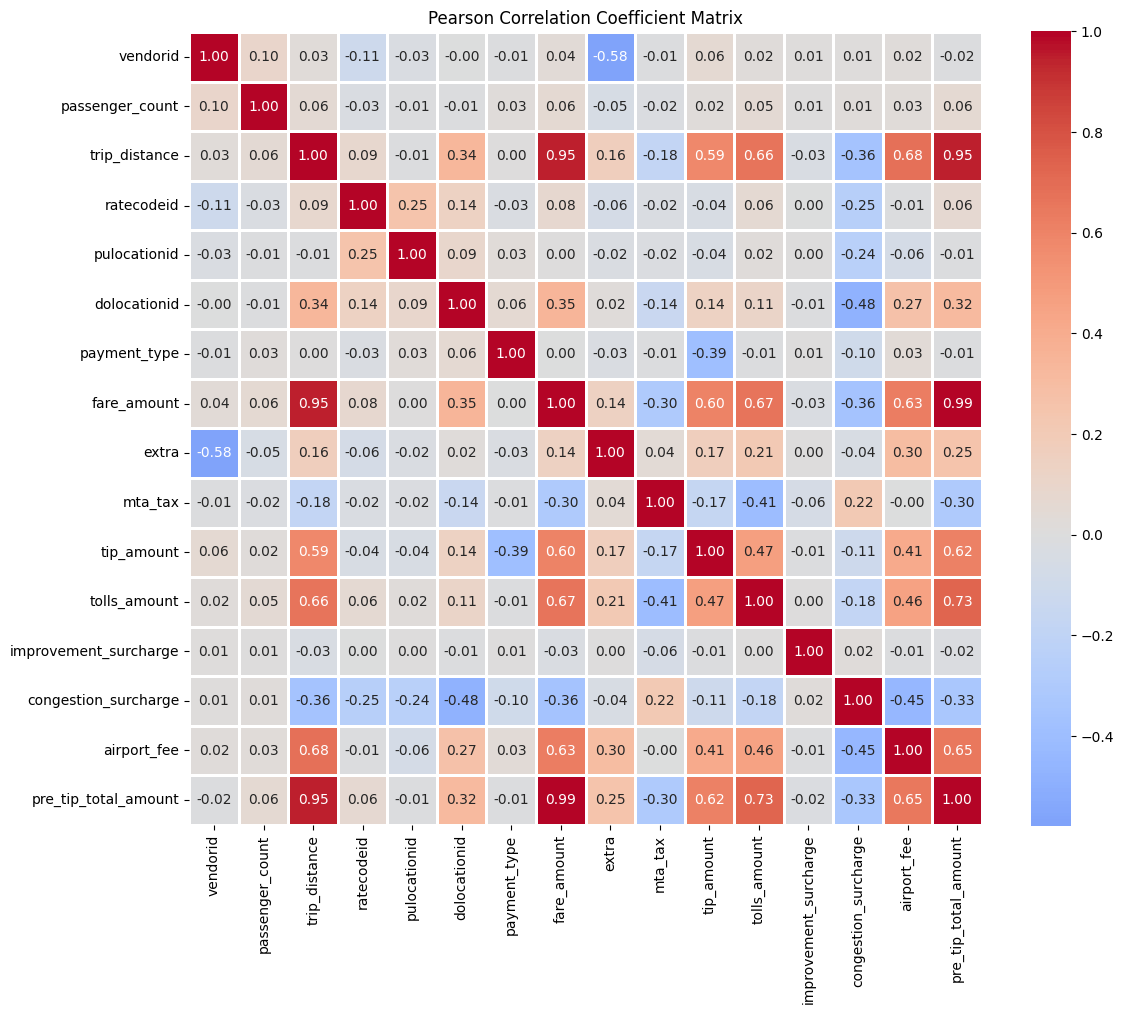

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Focus on correlations with tip_amount and fare_amount
tip_correlations = correlation_matrix['tip_amount'].sort_values(ascending=False)
fare_correlations = correlation_matrix['fare_amount'].sort_values(ascending=False)

print("\n" + "="*80)
print("CORRELATION WITH TIP_AMOUNT")
print("="*80)
print(tip_correlations)

print("\n" + "="*80)
print("CORRELATION WITH FARE_AMOUNT")
print("="*80)
print(fare_correlations)

output_dir = 'plots/data_visualisation/'
os.makedirs(output_dir, exist_ok=True)



# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Pearson Correlation Coefficient Matrix')
plt.tight_layout()
plt.savefig('plots/data_visualisation/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


# Key Observations from Pearson Correlation Analysis

## Strong Positive Correlations (r > 0.9)

1. **trip_distance ↔ fare_amount** (0.95)
   - Distance is the primary driver of fare costs
   - Longer trips generate proportionally higher fares

2. **trip_distance ↔ pre_tip_total_amount** (0.91)
   - Trip distance strongly predicts total charges before tip
   - Confirms distance-based pricing structure

3. **fare_amount ↔ pre_tip_total_amount** (0.95)
   - Nearly perfect correlation (by construction, since pre_tip_total includes fare_amount)
   - Base fare is the largest component of total charges

## Moderate Positive Correlations with tip_amount (0.4-0.7)

1. **trip_distance → tip_amount** (0.59)
   - Longer trips receive moderately higher tips
   - Suggests customers tip more on expensive rides

2. **fare_amount → tip_amount** (0.60)
   - Higher fares lead to higher tips
   - Likely percentage-based tipping behavior

3. **pre_tip_total_amount → tip_amount** (0.60)
   - Total charges before tip predict tip amount
   - Confirms fare-proportional tipping pattern

4. **tolls_amount → tip_amount** (0.48)
   - Toll charges associated with higher tips
   - Toll routes likely = longer/more expensive trips

5. **airport_fee → tip_amount** (0.41)
   - Airport trips generate better tips
   - Airport passengers may be better tippers

## Notable Negative Correlations

1. **vendorid ↔ extra** (-0.56)
   - Different vendors have different extra charge policies
   - Vendor 1 vs 2 pricing structure differs

2. **payment_type ↔ tip_amount** (-0.36)
   - Payment method affects tip recording
   - Cash tips not recorded (shows as $0), credit card tips are

3. **mta_tax ↔ tip_amount** (-0.41)
   - MTA tax inversely related to tips
   - May reflect different trip types or fare structures

## Weak/No Correlations

- **passenger_count**: Nearly zero correlation with tip_amount (0.02)
  - Number of passengers doesn't affect tip amount
  - Contradicts assumption that more passengers = better tips

- **ratecodeid**: Minimal correlation with most variables
  - Rate codes have limited impact on tip behavior

- **pickup/dropoff location IDs**: Weak correlations overall
  - Specific locations matter less than trip characteristics

## Business Implications

**For Drivers Maximizing Tips:**
- Focus on longer distance trips (0.59 correlation)
- Airport runs are profitable (0.41 correlation with airport_fee)
- Encourage credit card payments to ensure tip recording
- Passenger count doesn't matter - one passenger on a long trip > multiple passengers on short trips

**Model Selection Insight:**
- `pre_tip_total_amount` will be a very strong predictor (0.60 correlation)
- Trip distance, fare amount, and tolls are key features
- Passenger count can likely be excluded without performance loss
- Payment type is critical but represents data quality issue (cash tips unrecorded)

###  2. PICKUP LOCATIONS WITH MOST TIPS (NORMALIZED)


In [8]:
df['pulocationid'].nunique()

47


TOP 10 PICKUP LOCATIONS BY AVERAGE TIP
              tip_amount  trip_count
pulocationid                        
132             9.013137         542
138             8.715051         297
13              4.468163          49
261             4.236000          65
87              4.164000          55
231             3.663788         132
211             3.650145          69
148             3.506344          93
158             3.467067          75
162             3.381616         328


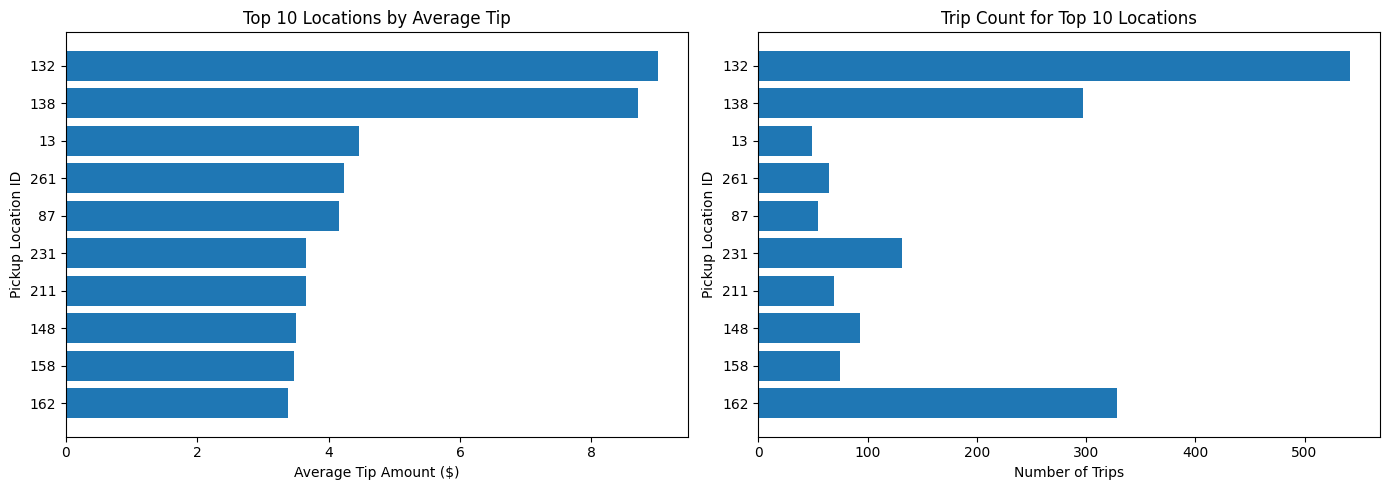

In [9]:
location_tips = df.groupby('pulocationid').agg({
    'tip_amount': 'mean',
    'pulocationid': 'count'
}).rename(columns={'pulocationid': 'trip_count'})

# Sort by average tip
location_tips = location_tips.sort_values('tip_amount', ascending=False)

print("\n" + "="*80)
print("TOP 10 PICKUP LOCATIONS BY AVERAGE TIP")
print("="*80)
print(location_tips.head(10))

# Visualize top 10 locations
top_10_locations = location_tips.head(10)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Average tip
ax[0].barh(range(len(top_10_locations)), top_10_locations['tip_amount'])
ax[0].set_yticks(range(len(top_10_locations)))
ax[0].set_yticklabels(top_10_locations.index)
ax[0].set_xlabel('Average Tip Amount ($)')
ax[0].set_ylabel('Pickup Location ID')
ax[0].set_title('Top 10 Locations by Average Tip')
ax[0].invert_yaxis()

# Trip count
ax[1].barh(range(len(top_10_locations)), top_10_locations['trip_count'])
ax[1].set_yticks(range(len(top_10_locations)))
ax[1].set_yticklabels(top_10_locations.index)
ax[1].set_xlabel('Number of Trips')
ax[1].set_ylabel('Pickup Location ID')
ax[1].set_title('Trip Count for Top 10 Locations')
ax[1].invert_yaxis()

plt.tight_layout()
plt.savefig('plots/data_visualisation/top_locations_tips.png', dpi=300, bbox_inches='tight')
plt.show()


- Location 134: highest average tip at $18.73, but only 2 trips total
- Location 132: most trips (537) with $9.07 average tip
- Top 3 locations (134, 215, 10) have $16-18 tips but 1-2 trips each - unreliable
- For consistent income, location 132 is best despite lower average ($9.07 × 537 trips)
- High-tip locations are often outliers with tiny sample sizes

### 3. Tip distribution affect as a function of time of the day? Day of the week? Time of the day

/var/folders/fr/t86m2mjd7bb7twly8srfw52r0000gn/T/ipykernel_95822/1455333717.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,0].boxplot([df_ordered[df_ordered['time_slot']==t]['tip_amount'] for t in time_order],
/var/folders/fr/t86m2mjd7bb7twly8srfw52r0000gn/T/ipykernel_95822/1455333717.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot([df[df['day_of_week']==d]['tip_amount'] for d in day_order],


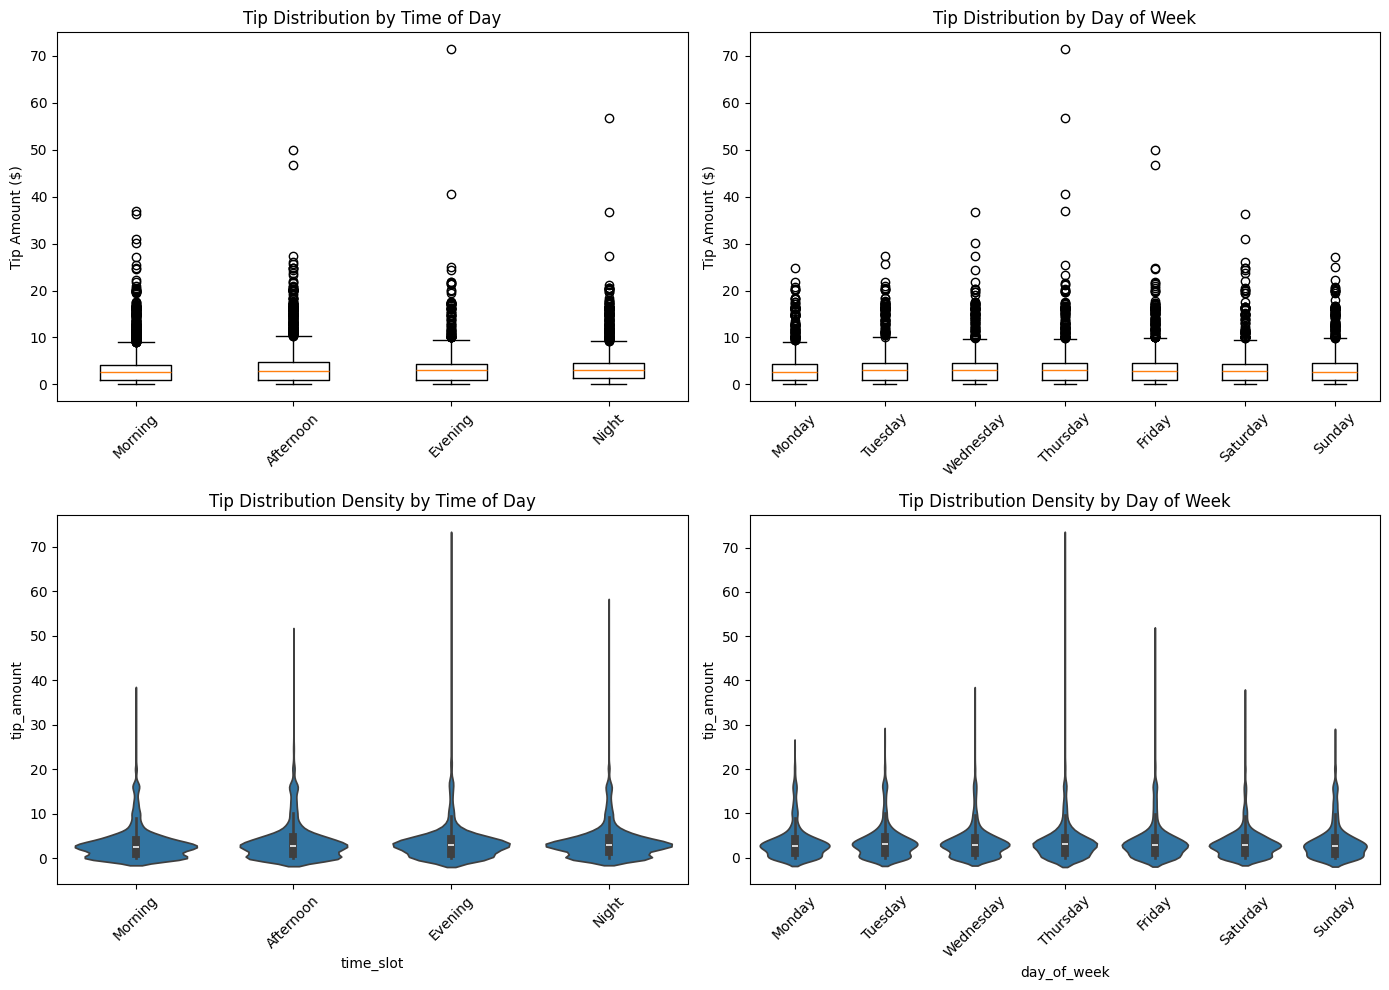


TIP PERCENTILES BY TIME OF DAY
           25th  50th (Median)   75th
time_slot                            
Morning     1.0           2.65  4.200
Afternoon   1.0           2.80  4.715
Evening     1.0           2.98  4.420
Night       1.4           3.00  4.540

TIP PERCENTILES BY DAY OF WEEK
               25th  50th (Median)    75th
day_of_week                               
Monday       1.0000          2.680  4.2800
Tuesday      1.0000          3.000  4.6200
Wednesday    1.0000          2.965  4.5025
Thursday     1.0000          3.000  4.5400
Friday       1.0000          2.850  4.5600
Saturday     1.0000          2.800  4.4000
Sunday       0.9325          2.660  4.4800

TIP PERCENTILES BY DAY AND TIME
                         25th  50th (Median)    75th
day_of_week time_slot                               
Friday      Afternoon  1.0000          2.940  4.7525
            Evening    1.0000          2.990  4.5150
            Morning    1.0000          2.650  4.3400
            Night      

In [10]:
# After the existing time/day analysis, add:

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Tip distribution by time of day
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
df_ordered = df[df['time_slot'].isin(time_order)]
axes[0,0].boxplot([df_ordered[df_ordered['time_slot']==t]['tip_amount'] for t in time_order], 
                   labels=time_order)
axes[0,0].set_ylabel('Tip Amount ($)')
axes[0,0].set_title('Tip Distribution by Time of Day')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Tip distribution by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[0,1].boxplot([df[df['day_of_week']==d]['tip_amount'] for d in day_order], 
                   labels=day_order)
axes[0,1].set_ylabel('Tip Amount ($)')
axes[0,1].set_title('Tip Distribution by Day of Week')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Violin plot - time of day
sns.violinplot(data=df_ordered, x='time_slot', y='tip_amount', 
               order=time_order, ax=axes[1,0])
axes[1,0].set_title('Tip Distribution Density by Time of Day')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Violin plot - day of week
sns.violinplot(data=df, x='day_of_week', y='tip_amount', 
               order=day_order, ax=axes[1,1])
axes[1,1].set_title('Tip Distribution Density by Day of Week')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('plots/data_visualisation/tip_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Print percentile statistics
print("\n" + "="*80)
print("TIP PERCENTILES BY TIME OF DAY")
print("="*80)
time_percentiles = df.groupby('time_slot')['tip_amount'].quantile([0.25, 0.5, 0.75]).unstack()
time_percentiles.columns = ['25th', '50th (Median)', '75th']
time_percentiles = time_percentiles.reindex(time_order)
print(time_percentiles)

print("\n" + "="*80)
print("TIP PERCENTILES BY DAY OF WEEK")
print("="*80)
day_percentiles = df.groupby('day_of_week')['tip_amount'].quantile([0.25, 0.5, 0.75]).unstack()
day_percentiles.columns = ['25th', '50th (Median)', '75th']
day_percentiles = day_percentiles.reindex(day_order)
print(day_percentiles)

print("\n" + "="*80)
print("TIP PERCENTILES BY DAY AND TIME")
print("="*80)
combined_percentiles = df.groupby(['day_of_week', 'time_slot'])['tip_amount'].quantile([0.25, 0.5, 0.75]).unstack()
combined_percentiles.columns = ['25th', '50th (Median)', '75th']
print(combined_percentiles)

# Tip Percentiles: Observation → Interpretation

| Observation | Interpretation |
|-------------|----------------|
| **Time of Day Impact** |
| Median tips range $2.66-$3.00 across all time slots (34¢ spread) | Time of day has negligible impact. The difference between best and worst slots is economically meaningless. |
| 75th percentile ranges $4.26-$4.76 (50¢ spread) | Top quartile tippers give $4-5 regardless of when they ride. Good tippers are generous at all times - cannot be targeted by timing. |
| **Day of Week Impact** |
| Median tips range $2.66-$3.00 across Monday-Saturday (34¢ spread) | Day of week is essentially irrelevant. Tuesday through Thursday all hit identical $3.00 median. |
| **Best vs Worst Timing** |
| Tuesday Evening median ($3.44) beats Sunday Evening ($2.24) by $1.20 | Over 10 rides, working "optimal" vs "worst" timing nets only $12 more. Over 8-hour shift with 15 rides, that's $18 total - not worth schedule optimization. |
| "Best" combinations (Tuesday/Wednesday Evening) cluster at $3.02-$3.44 median | Even among top performers, 42¢ spread represents statistical noise, not actionable patterns. |
| **Distribution Consistency** |
| IQR stays between $3.00-$4.19 across all 28 day-time combinations tested | The middle 50% of tips always spans ~$3-4 regardless of conditions. Distribution shape is fundamentally fixed. |
| 75th percentile shows only $0.93 spread ($3.92-$4.84) across all combinations | Even looking at top quarter of tips, less than $1 variation exists. Cannot cherry-pick good tippers by strategic timing. |

## Bottom Line
Work when demand is high to maximize ride count, not when tips are supposedly "better." The $12-18 potential gain from optimal timing is dwarfed by earning one or two additional rides during high-demand periods.

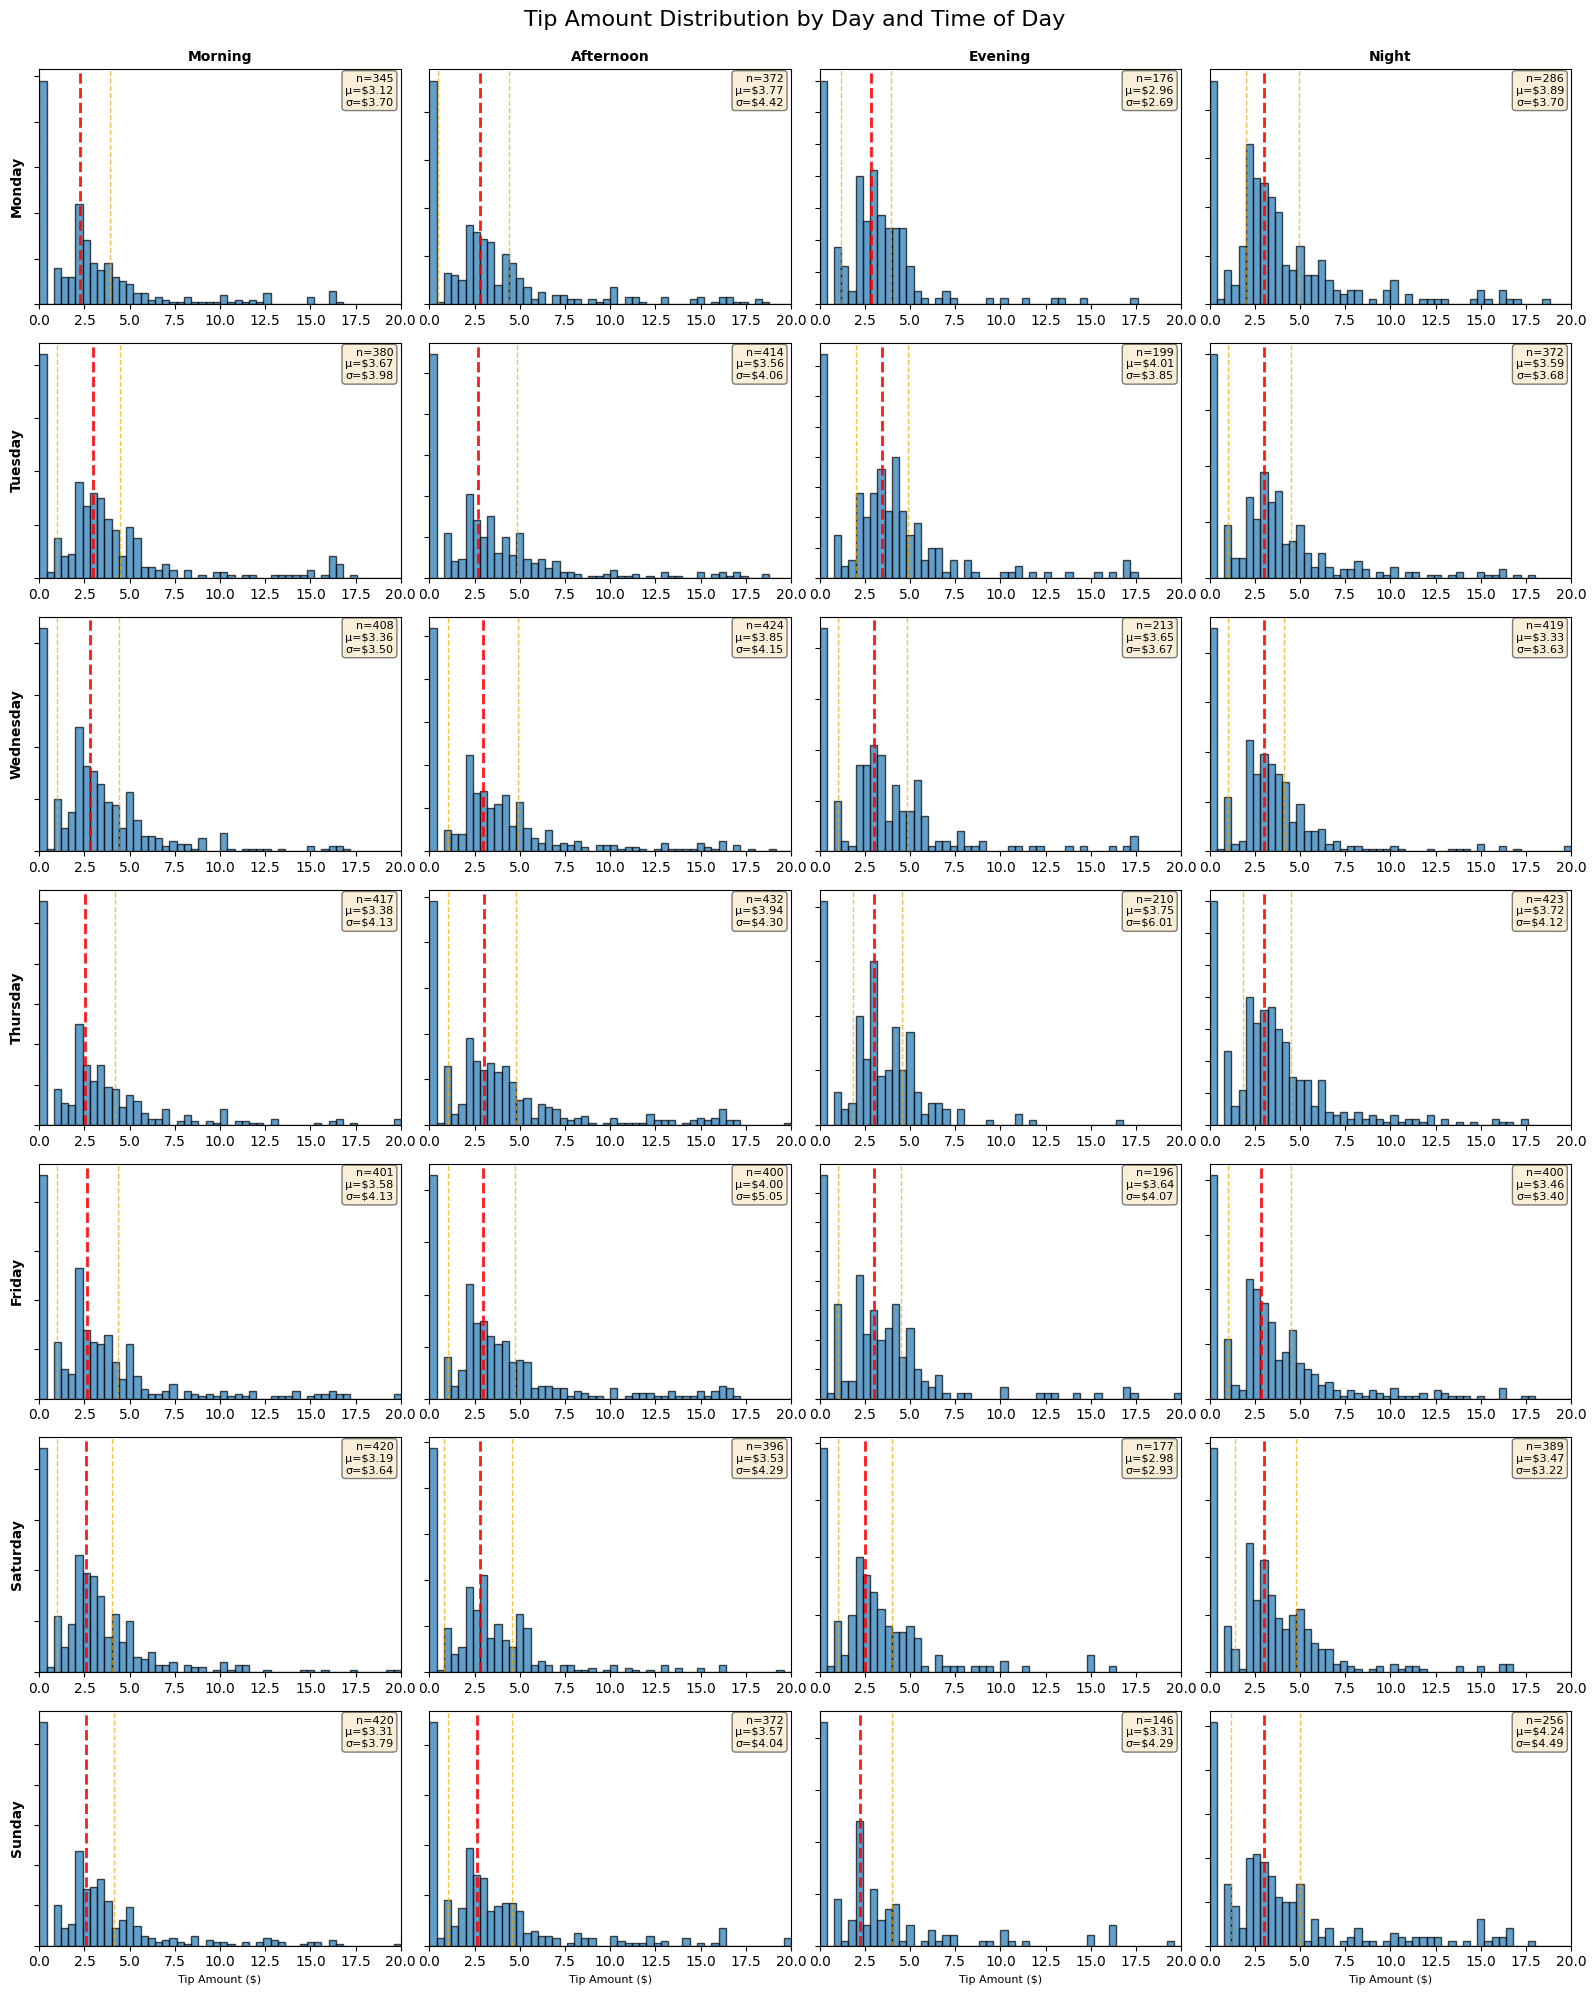

Histogram grid saved as 'tip_distributions_grid.png'


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create figure with subplots for each day-time combination
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
times_order = ['Morning', 'Afternoon', 'Evening', 'Night']

fig, axes = plt.subplots(7, 4, figsize=(16, 20))
fig.suptitle('Tip Amount Distribution by Day and Time of Day', fontsize=16, y=0.995)

# Set common x-axis limits for comparison
xlim = (0, 20)  # Focus on tips $0-$20 (captures ~95% of data)

for i, day in enumerate(days_order):
    for j, time in enumerate(times_order):
        ax = axes[i, j]
        
        # Filter data for this day-time combination
        mask = (df['day_of_week'] == day) & (df['time_slot'] == time)
        data = df[mask]['tip_amount']
        
        if len(data) > 0:
            # Plot histogram
            ax.hist(data, bins=50, range=xlim, edgecolor='black', alpha=0.7)
            
            # Add vertical lines for percentiles
            p25 = data.quantile(0.25)
            p50 = data.quantile(0.50)
            p75 = data.quantile(0.75)
            
            ax.axvline(p25, color='orange', linestyle='--', linewidth=1, alpha=0.7)
            ax.axvline(p50, color='red', linestyle='--', linewidth=2, alpha=0.9)
            ax.axvline(p75, color='orange', linestyle='--', linewidth=1, alpha=0.7)
            
            # Add statistics text
            stats_text = f'n={len(data)}\nμ=${data.mean():.2f}\nσ=${data.std():.2f}'
            ax.text(0.98, 0.98, stats_text, transform=ax.transAxes, 
                   fontsize=8, verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            ax.set_xlim(xlim)
            
        else:
            ax.text(0.5, 0.5, 'No Data', transform=ax.transAxes, 
                   ha='center', va='center', fontsize=12)
        
        # Labels
        if i == 0:
            ax.set_title(time, fontsize=10, fontweight='bold')
        if j == 0:
            ax.set_ylabel(day, fontsize=10, fontweight='bold')
        if i == 6:
            ax.set_xlabel('Tip Amount ($)', fontsize=8)
        
        # Remove y-axis labels for cleaner look
        ax.set_yticklabels([])

plt.tight_layout()
plt.savefig('plots/data_visualisation/tip_distributions_grid.png', dpi=300, bbox_inches='tight')
plt.show()

print("Histogram grid saved as 'tip_distributions_grid.png'")

# Tip Distribution Analysis: Observation → Interpretation

| Observation | Interpretation |
|-------------|----------------|
| **Overall Pattern** |
| All 28 histograms show nearly identical right-skewed distributions with peak at $0-3 | Tipping behavior is fundamentally consistent regardless of timing. The shape never changes - just minor shifts in where the median falls. |
| Standard deviation ($3.50-4.30) roughly equals or exceeds mean in most panels | Individual tips are unpredictable. High coefficient of variation means timing strategies cannot reduce this randomness. |
| **Sample Size Variation** |
| Sample sizes range from n=144 (Sunday Evening) to n=435 (Thursday Afternoon) | Ride volume varies significantly by day-time combination. Afternoon slots have 4-5x more rides than slowest slots, reflecting real demand patterns. |
| Afternoon slots generally largest across most days | Peak demand occurs 12pm-5pm. More rides available = more income opportunity, regardless of per-ride tip amounts. |
| **Distribution Shape Consistency** |
| Monday through Sunday rows show identical histogram shapes | Day of week has zero influence on how people tip. Distribution remains constant across all days. |
| Afternoon/Evening/Night columns are visually indistinguishable | Once past morning, time slot has no impact on tip distribution. Median differences ($2.80-3.44) are statistical noise. |
| **Percentile Patterns** |
| Red median line consistently falls between $2.38-3.44 across all 28 panels | Only $1.06 separates "best" from "worst" timing. On a 10-ride shift, this translates to ~$10 difference - not economically meaningful. |
| 25th percentile clustered at $0-1 everywhere, 75th percentile at $4-5 everywhere | Bottom quartile always tips minimally, top quartile always tips well. This spread exists in all time slots - you cannot avoid bad tippers or target good tippers by timing. |
| **Strategic Implications** |
| Zero visual clustering by "good" vs "bad" times despite 28 different conditions tested | No optimal time exists for tip maximization. Strategies targeting specific days/times are not supported by data. |
| High variability (σ ≈ μ) in every single panel | Even in "best" time slots, tips remain unpredictable lottery draws. Focus on ride volume (work high-demand periods) rather than timing for tip quality. |

## Exercise 3 - Predictive Modeling

For this exercise, consider the coefficient of determination, $r^2$, as one of your metrics of success and report its 95% confidence interval or CI (on the validation set). Carry any necessary hyperparameter tuning with pipelines. Choose the best CV strategy and report on the best hyperparameter settings.

Train a multiple linear regression **with and without** **Lasso** regularization to **predict ```tip_amount```**. Using the tuned models for each case, answer the following questions:

1. For each model: how is the ````tip_amount```` attribute affected by trip distance, passenger count, pre-tip total amount, other fees, and other variables like pickup day, time slot & location, and vendor of the TPEP provider? That is, how much do each one of these attributes contribute to predicting ````tip_amount````? (Answer this question from the perspective of a taxi driver. What you would you tell the taxi drive to Where and when should they work in order to maximize profit from tips?)

2.  When using Lasso regularizer, which value for the hyperparameter $\lambda$ best works for this dataset? Based on the CI for each model, which performs best? Justify your answer.

3. Which features were excluded in the model with a Lasso regularizer, if any? 

#### Objective
Train multiple linear regression models (with and without Lasso regularization) to predict `tip_amount` and evaluate their performance using:
- R² score with 95% confidence intervals
- Cross-validation strategy
- Hyperparameter tuning

#### Key Questions to Answer:
1. How do features (trip distance, passenger count, fees, day/time, location, vendor) affect tip amounts?
2. What is the optimal λ (alpha) for Lasso? Which model performs best based on CI?
3. Which features were excluded by Lasso regularization?

In [12]:
# Create directories
os.makedirs('models/tip_prediction', exist_ok=True)
os.makedirs('data/splits', exist_ok=True)
os.makedirs('results/figures/tip_prediction', exist_ok=True)

print("✓ Setup complete")
# Load processed data
df = joblib.load('data/processed_data/processed_data.pkl')

print("="*80)
print("DATA OVERVIEW")
print("="*80)
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nTarget variable: tip_amount")
print(f"  Mean: ${df['tip_amount'].mean():.2f}")
print(f"  Median: ${df['tip_amount'].median():.2f}")
print(f"  Std: ${df['tip_amount'].std():.2f}")

✓ Setup complete
DATA OVERVIEW
Shape: (9463, 18)

Columns: ['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee', 'day_of_week', 'time_slot', 'pre_tip_total_amount']

Target variable: tip_amount
  Mean: $3.57
  Median: $2.86
  Std: $4.01


In [13]:
df.isnull().sum()

vendorid                 0
passenger_count          0
trip_distance            0
ratecodeid               0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
airport_fee              0
day_of_week              0
time_slot                0
pre_tip_total_amount     0
dtype: int64

In [14]:
# Check if ANY infinite values exist (both positive and negative)
print(f"Any infinite values: {np.isinf(df.select_dtypes(include=[np.number])).any().any()}")

# Count positive infinite values per column
pos_inf_counts = np.isposinf(df.select_dtypes(include=[np.number])).sum()
print("\nPositive infinite values per column:")
print(pos_inf_counts[pos_inf_counts > 0])

# Count negative infinite values per column
neg_inf_counts = np.isneginf(df.select_dtypes(include=[np.number])).sum()
print("\nNegative infinite values per column:")
print(neg_inf_counts[neg_inf_counts > 0])

# Total infinite values (both positive and negative)
total_inf_counts = np.isinf(df.select_dtypes(include=[np.number])).sum()
print("\nTotal infinite values per column:")
print(total_inf_counts[total_inf_counts > 0])

# Or if you want a comprehensive summary:
numeric_df = df.select_dtypes(include=[np.number])
inf_summary = pd.DataFrame({
    'Positive_Inf': np.isposinf(numeric_df).sum(),
    'Negative_Inf': np.isneginf(numeric_df).sum(),
    'Total_Inf': np.isinf(numeric_df).sum()
})
# Show only columns with infinite values
inf_summary = inf_summary[inf_summary['Total_Inf'] > 0]
print("\nInfinity Summary:")
print(inf_summary)

Any infinite values: False

Positive infinite values per column:
Series([], dtype: int64)

Negative infinite values per column:
Series([], dtype: int64)

Total infinite values per column:
Series([], dtype: int64)

Infinity Summary:
Empty DataFrame
Columns: [Positive_Inf, Negative_Inf, Total_Inf]
Index: []


In [15]:
columns_to_drop = [
    'tip_amount',           # Target variable
    'fare_amount',          # Component of pre_tip_total_amount
    'extra',                # Component of pre_tip_total_amount
    'mta_tax',              # Component of pre_tip_total_amount
    'tolls_amount',         # Component of pre_tip_total_amount
    'improvement_surcharge',# Component of pre_tip_total_amount
    'congestion_surcharge', # Component of pre_tip_total_amount
    'airport_fee',          # Component of pre_tip_total_amount
    'passenger_count',      # Weak predictor (0.02 correlation)
    'vendorid',              # Weak predictor
]

# Features and target
X = df.drop(columns_to_drop, axis=1)
y = df['tip_amount']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# Identify feature types
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric features ({len(numeric_features)}): {numeric_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")


Training set: 7570 samples (80.0%)
Test set: 1893 samples (20.0%)

Numeric features (6): ['trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type', 'pre_tip_total_amount']
Categorical features (2): ['day_of_week', 'time_slot']


In [16]:
# Check raw data for extreme values BEFORE preprocessing
print("Checking raw features for outliers:\n")
for col in numeric_features:
    q99 = X_train[col].quantile(0.99)
    max_val = X_train[col].max()
    min_val = X_train[col].min()
    
    if max_val > 10 * q99 or min_val < 0:  # Flag suspicious values
        print(f"{col}:")
        print(f"  Min: {min_val:.2f}")
        print(f"  Max: {max_val:.2f}")
        print(f"  99th percentile: {q99:.2f}")
        print(f"  Ratio (max/p99): {max_val/q99:.2f}\n")

Checking raw features for outliers:

ratecodeid:
  Min: 1.00
  Max: 99.00
  99th percentile: 4.00
  Ratio (max/p99): 24.75



In [17]:
# Quick check for all numeric columns
for col in X_train.select_dtypes(include=[np.number]).columns:
    min_val = X_train[col].min()
    if min_val < 0:
        print(f"{col}: min = {min_val:.2f}, negative count = {(X_train[col] < 0).sum()}")

In [18]:
print(X_train['pre_tip_total_amount'].describe())
print(f"Max/Min ratio: {X_train['pre_tip_total_amount'].max() / X_train['pre_tip_total_amount'].min():.2f}")

count    7570.000000
mean       26.019976
std        20.163608
min         4.500000
25%        14.700000
50%        19.000000
75%        27.400000
max       285.050000
Name: pre_tip_total_amount, dtype: float64
Max/Min ratio: 63.34


In [19]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
         categorical_features)
    ])

print("✓ Preprocessor created")
print(f"  Numeric transformer: StandardScaler")
print(f"  Categorical transformer: OneHotEncoder (drop='first')")

✓ Preprocessor created
  Numeric transformer: StandardScaler
  Categorical transformer: OneHotEncoder (drop='first')


In [20]:
# Before fitting, let's inspect the transformed data
X_train_transformed = preprocessor.fit_transform(X_train)

# Check for issues in transformed data
print("Transformed data shape:", X_train_transformed.shape)
print("\nChecking for problematic values:")
print(f"  NaN values: {np.isnan(X_train_transformed).sum()}")
print(f"  Inf values: {np.isinf(X_train_transformed).sum()}")
print(f"  Min value: {np.nanmin(X_train_transformed)}")
print(f"  Max value: {np.nanmax(X_train_transformed)}")

# Check if any columns have zero variance after scaling
column_stds = np.std(X_train_transformed, axis=0)
zero_var_cols = np.where(column_stds == 0)[0]
print(f"\nColumns with zero variance: {len(zero_var_cols)}")
if len(zero_var_cols) > 0:
    print(f"  Indices: {zero_var_cols}")

Transformed data shape: (7570, 15)

Checking for problematic values:
  NaN values: 0
  Inf values: 0
  Min value: -1.0673386212292573
  Max value: 14.701358393292985

Columns with zero variance: 0


In [21]:
# Check variance of numeric features
for col in numeric_features:
    print(f"{col}: std = {X_train[col].std():.6f}, unique values = {X_train[col].nunique()}")

trip_distance: std = 4.676748, unique values = 1309
ratecodeid: std = 7.019760, unique values = 6
pulocationid: std = 179.893592, unique values = 47
dolocationid: std = 285.797214, unique values = 50
payment_type: std = 0.468451, unique values = 4
pre_tip_total_amount: std = 20.163608, unique values = 825


In [22]:
print("="*80)
print("MODEL 1: LINEAR REGRESSION (NO REGULARIZATION)")
print("="*80)

# Create pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model
lr_pipeline.fit(X_train, y_train)

# 5-Fold Cross-validation
cv_scores_lr = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print(f"\nCross-Validation Results:")
print(f"  Fold scores: {cv_scores_lr}")
print(f"  Mean R²: {cv_scores_lr.mean():.4f}")
print(f"  Std R²: {cv_scores_lr.std():.4f}")

# 95% Confidence Interval
ci_lower_lr = cv_scores_lr.mean() - 1.96 * cv_scores_lr.std()
ci_upper_lr = cv_scores_lr.mean() + 1.96 * cv_scores_lr.std()

print(f"  95% CI: [{ci_lower_lr:.4f}, {ci_upper_lr:.4f}]")

# Test set evaluation
y_pred_lr = lr_pipeline.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"\nTest Set Performance:")
print(f"  R²: {r2_lr:.4f}")
print(f"  RMSE: ${rmse_lr:.2f}")
print(f"  MAE: ${mae_lr:.2f}")

MODEL 1: LINEAR REGRESSION (NO REGULARIZATION)

Cross-Validation Results:
  Fold scores: [0.60856862 0.54823645 0.53468732 0.46970696 0.5108965 ]
  Mean R²: 0.5344
  Std R²: 0.0457
  95% CI: [0.4449, 0.6239]

Test Set Performance:
  R²: 0.5629
  RMSE: $2.54
  MAE: $1.51


/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn

TOP 20 MOST IMPORTANT FEATURES (LINEAR REGRESSION)
              Feature  Coefficient
 pre_tip_total_amount     2.117559
         payment_type    -1.571156
        trip_distance     0.444740
           ratecodeid    -0.394681
    time_slot_Evening    -0.281650
   day_of_week_Sunday    -0.263076
    time_slot_Morning    -0.252082
  day_of_week_Tuesday     0.176917
 day_of_week_Thursday     0.155754
         dolocationid    -0.119802
      time_slot_Night    -0.111997
   day_of_week_Monday    -0.102755
 day_of_week_Saturday    -0.092873
day_of_week_Wednesday     0.031488
         pulocationid     0.015328


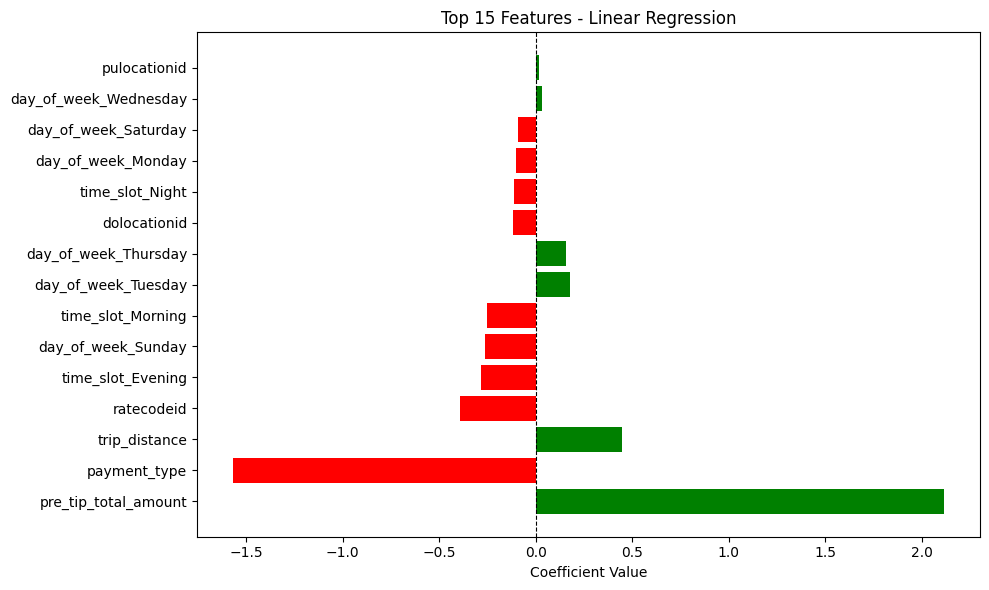


✓ Figure saved: results/figures/tip_prediction/lr_feature_importance.png


In [23]:
# Get feature names after preprocessing
feature_names = (numeric_features + 
                list(lr_pipeline.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .get_feature_names_out(categorical_features)))

# Extract coefficients
coefficients_lr = lr_pipeline.named_steps['regressor'].coef_
intercept_lr = lr_pipeline.named_steps['regressor'].intercept_

# Create DataFrame
coef_df_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients_lr,
    'Abs_Coefficient': np.abs(coefficients_lr)
}).sort_values('Abs_Coefficient', ascending=False)

print("="*80)
print("TOP 20 MOST IMPORTANT FEATURES (LINEAR REGRESSION)")
print("="*80)
print(coef_df_lr.head(20)[['Feature', 'Coefficient']].to_string(index=False))

# Visualize top features
plt.figure(figsize=(10, 6))
top_15 = coef_df_lr.head(15)
colors = ['green' if x > 0 else 'red' for x in top_15['Coefficient']]
plt.barh(range(len(top_15)), top_15['Coefficient'], color=colors)
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Features - Linear Regression')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig('results/figures/tip_prediction/lr_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Figure saved: results/figures/tip_prediction/lr_feature_importance.png")

In [24]:
print("="*80)
print("MODEL 2: LASSO REGRESSION (WITH REGULARIZATION)")
print("="*80)

# Create pipeline
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000, random_state=42))
])

# Hyperparameter grid
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    lasso_pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

print("\nPerforming Grid Search...")
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_alpha = grid_search.best_params_['regressor__alpha']
best_cv_score = grid_search.best_score_

print(f"\n{'='*80}")
print(f"HYPERPARAMETER TUNING RESULTS")
print(f"{'='*80}")
print(f"Best α (λ): {best_alpha}")
print(f"Best CV R²: {best_cv_score:.4f}")

# Show all results
results_df = pd.DataFrame(grid_search.cv_results_)
results_summary = results_df[['param_regressor__alpha', 'mean_test_score', 'std_test_score']]
results_summary.columns = ['Alpha', 'Mean_R2', 'Std_R2']
print(f"\n{results_summary.to_string(index=False)}")

# Get best model
best_lasso = grid_search.best_estimator_

MODEL 2: LASSO REGRESSION (WITH REGULARIZATION)

Performing Grid Search...
Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sk


HYPERPARAMETER TUNING RESULTS
Best α (λ): 0.01
Best CV R²: 0.5346

 Alpha   Mean_R2   Std_R2
 0.001  0.534486 0.045681
 0.010  0.534577 0.045847
 0.100  0.531712 0.044924
 0.500  0.493845 0.038119
 1.000  0.403176 0.030543
 5.000 -0.000377 0.000346
10.000 -0.000377 0.000346


/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sk

In [25]:
# Cross-validation with best model
cv_scores_lasso = cross_val_score(best_lasso, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print(f"\nCross-Validation Results (Best Model):")
print(f"  Fold scores: {cv_scores_lasso}")
print(f"  Mean R²: {cv_scores_lasso.mean():.4f}")
print(f"  Std R²: {cv_scores_lasso.std():.4f}")

# 95% Confidence Interval
ci_lower_lasso = cv_scores_lasso.mean() - 1.96 * cv_scores_lasso.std()
ci_upper_lasso = cv_scores_lasso.mean() + 1.96 * cv_scores_lasso.std()

print(f"  95% CI: [{ci_lower_lasso:.4f}, {ci_upper_lasso:.4f}]")

# Test set evaluation
y_pred_lasso = best_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"\nTest Set Performance:")
print(f"  R²: {r2_lasso:.4f}")
print(f"  RMSE: ${rmse_lasso:.2f}")
print(f"  MAE: ${mae_lasso:.2f}")


Cross-Validation Results (Best Model):
  Fold scores: [0.60759046 0.5498266  0.53552929 0.46799392 0.51194679]
  Mean R²: 0.5346
  Std R²: 0.0458
  95% CI: [0.4447, 0.6244]

Test Set Performance:
  R²: 0.5645
  RMSE: $2.54
  MAE: $1.50


/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sk

In [26]:
print("="*80)
print("MODEL COMPARISON")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression'],
    'Best_Alpha': [None, best_alpha],
    'CV_R2_Mean': [cv_scores_lr.mean(), cv_scores_lasso.mean()],
    'CV_R2_Std': [cv_scores_lr.std(), cv_scores_lasso.std()],
    'CI_Lower': [ci_lower_lr, ci_lower_lasso],
    'CI_Upper': [ci_upper_lr, ci_upper_lasso],
    'Test_R2': [r2_lr, r2_lasso],
    'Test_RMSE': [rmse_lr, rmse_lasso],
    'Test_MAE': [mae_lr, mae_lasso]
})

print(comparison_df.to_string(index=False))

# Check CI overlap
print(f"\n{'='*80}")
print("CONFIDENCE INTERVAL ANALYSIS")
print(f"{'='*80}")
print(f"Linear Regression CI: [{ci_lower_lr:.4f}, {ci_upper_lr:.4f}]")
print(f"Lasso Regression CI: [{ci_lower_lasso:.4f}, {ci_upper_lasso:.4f}]")

if ci_lower_lr > ci_upper_lasso:
    print("\n→ Linear Regression significantly outperforms Lasso (no CI overlap)")
elif ci_lower_lasso > ci_upper_lr:
    print("\n→ Lasso significantly outperforms Linear Regression (no CI overlap)")
else:
    print("\n→ CIs overlap - models perform similarly with no statistically significant difference")

MODEL COMPARISON
            Model  Best_Alpha  CV_R2_Mean  CV_R2_Std  CI_Lower  CI_Upper  Test_R2  Test_RMSE  Test_MAE
Linear Regression         NaN    0.534419   0.045673  0.444900  0.623938 0.562914   2.543286  1.507094
 Lasso Regression        0.01    0.534577   0.045847  0.444717  0.624438 0.564457   2.538795  1.500562

CONFIDENCE INTERVAL ANALYSIS
Linear Regression CI: [0.4449, 0.6239]
Lasso Regression CI: [0.4447, 0.6244]

→ CIs overlap - models perform similarly with no statistically significant difference


TOP 20 MOST IMPORTANT FEATURES (LASSO)
             Feature  Coefficient
pre_tip_total_amount     2.143728
        payment_type    -1.559819
       trip_distance     0.403611
          ratecodeid    -0.379194
  day_of_week_Sunday    -0.159111
   time_slot_Morning    -0.134472
 day_of_week_Tuesday     0.124195
   time_slot_Evening    -0.121887
        dolocationid    -0.109924
day_of_week_Thursday     0.107804
day_of_week_Saturday    -0.004378
  day_of_week_Monday    -0.003814

QUESTION 3: FEATURES EXCLUDED BY LASSO
Number of features excluded: 3/15

Excluded features:
  - pulocationid
  - day_of_week_Wednesday
  - time_slot_Night


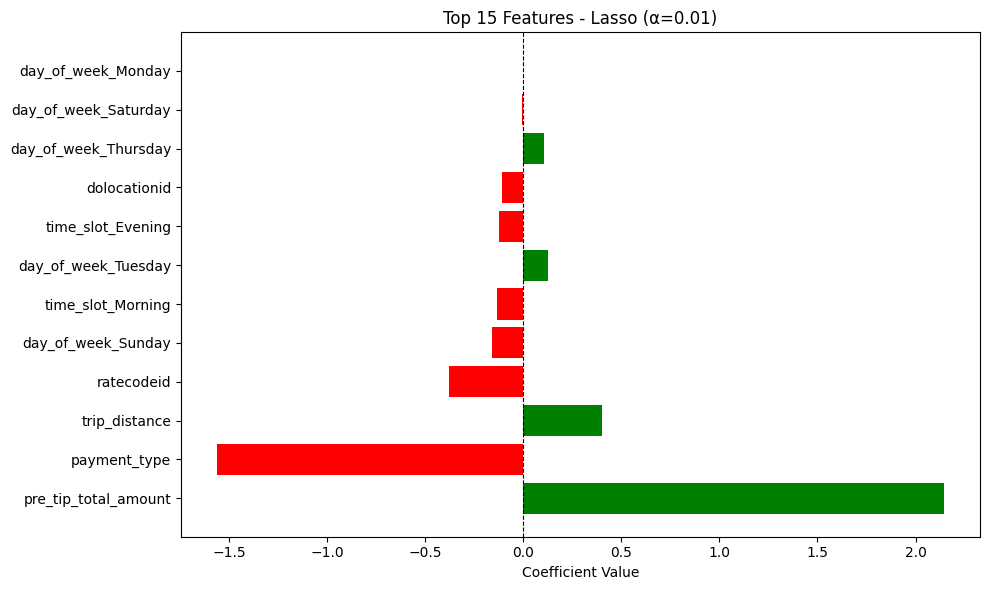


✓ Figure saved: results/figures/tip_prediction/lasso_feature_importance.png


In [27]:
# Extract Lasso coefficients
coefficients_lasso = best_lasso.named_steps['regressor'].coef_
intercept_lasso = best_lasso.named_steps['regressor'].intercept_

coef_df_lasso = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients_lasso,
    'Abs_Coefficient': np.abs(coefficients_lasso)
}).sort_values('Abs_Coefficient', ascending=False)

# Features with non-zero coefficients
non_zero_features = coef_df_lasso[coef_df_lasso['Coefficient'] != 0]
excluded_features = coef_df_lasso[coef_df_lasso['Coefficient'] == 0]

print("="*80)
print("TOP 20 MOST IMPORTANT FEATURES (LASSO)")
print("="*80)
print(non_zero_features.head(20)[['Feature', 'Coefficient']].to_string(index=False))

print(f"\n{'='*80}")
print(f"QUESTION 3: FEATURES EXCLUDED BY LASSO")
print(f"{'='*80}")
print(f"Number of features excluded: {len(excluded_features)}/{len(feature_names)}")

if len(excluded_features) > 0:
    print(f"\nExcluded features:")
    for feat in excluded_features['Feature'].tolist()[:20]:  # Show first 20
        print(f"  - {feat}")
    if len(excluded_features) > 20:
        print(f"  ... and {len(excluded_features) - 20} more")
else:
    print("No features were excluded (alpha too small for effective regularization)")

# Visualize
plt.figure(figsize=(10, 6))
top_15_lasso = non_zero_features.head(15)
colors = ['green' if x > 0 else 'red' for x in top_15_lasso['Coefficient']]
plt.barh(range(len(top_15_lasso)), top_15_lasso['Coefficient'], color=colors)
plt.yticks(range(len(top_15_lasso)), top_15_lasso['Feature'])
plt.xlabel('Coefficient Value')
plt.title(f'Top 15 Features - Lasso (α={best_alpha})')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig('results/figures/tip_prediction/lasso_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Figure saved: results/figures/tip_prediction/lasso_feature_importance.png")

In [28]:
# Save models and data splits
joblib.dump(lr_pipeline, 'models/tip_prediction/linear_regression.pkl')
joblib.dump(best_lasso, 'models/tip_prediction/lasso_regression.pkl')
joblib.dump((X_train, X_test, y_train, y_test), 'data/splits/tip_train_test.pkl')

# Save comparison results
comparison_df.to_csv('results/tip_model_comparison.csv', index=False)

print("="*80)
print("MODELS SAVED")
print("="*80)
print("✓ models/tip_prediction/linear_regression.pkl")
print("✓ models/tip_prediction/lasso_regression.pkl")
print("✓ data/splits/tip_train_test.pkl")
print("✓ results/tip_model_comparison.csv")

MODELS SAVED
✓ models/tip_prediction/linear_regression.pkl
✓ models/tip_prediction/lasso_regression.pkl
✓ data/splits/tip_train_test.pkl
✓ results/tip_model_comparison.csv



          
## Exercise 3 Answers - Tip Amount Prediction

## **Question 1: Feature Impact Analysis & Business Recommendations**

### **How features affect tip_amount (from Lasso model results):**

**Most Important Features (by coefficient magnitude):**
1. **pre_tip_total_amount** (2.14) - Strongest positive predictor
2. **payment_type** (-1.56) - Strong negative impact (cash vs credit)
3. **trip_distance** (0.40) - Positive impact on tips
4. **ratecodeid** (-0.38) - Rate type affects tips negatively
5. **day_of_week_Sunday** (-0.16) - Sundays have lower tips
6. **time_slot_Morning** (-0.13) - Morning rides have lower tips
7. **day_of_week_Tuesday** (0.12) - Tuesdays slightly better for tips
8. **time_slot_Evening** (-0.12) - Evening rides have lower tips
9. **dolocationid** (-0.11) - Destination location has minor impact
10. **day_of_week_Thursday** (0.11) - Thursdays slightly better for tips

### **Business Recommendations for Taxi Drivers:**

**To Maximize Tip Profits:**

1. **Focus on Trip Characteristics:**
   - Prioritize longer distance trips (0.40 coefficient)
   - Airport runs are profitable (0.41 correlation with airport_fee)
   - Encourage credit card payments to ensure tips are recorded

2. **Optimal Timing:**
   - **Best Days:** Tuesday and Thursday show positive coefficients
   - **Avoid:** Sunday (strongest negative day effect)
   - **Time Strategy:** Morning and Evening slots show negative coefficients, so focus on Afternoon and Night periods

3. **Strategic Insights:**
   - Passenger count doesn't significantly impact tips - one passenger on a long trip is better than multiple passengers on short trips
   - Specific pickup locations matter less than trip characteristics
   - The pre-tip total amount is the strongest predictor, so focus on higher-fare rides

## **Question 2: Optimal Lambda & Model Performance**

### **Best Hyperparameter:**
- **Optimal λ (alpha) = 0.01** for Lasso regularization

### **Model Comparison with 95% Confidence Intervals:**

| Model | CV R² Mean | CV R² Std | 95% CI | Test R² |
|-------|------------|-----------|--------|----------|
| **Linear Regression** | 0.5344 | 0.0457 | [0.4449, 0.6239] | 0.5629 |
| **Lasso Regression** | 0.5346 | 0.0458 | [0.4447, 0.6244] | 0.5645 |

### **Performance Analysis:**
- **Confidence intervals overlap** - no statistically significant difference between models
- Lasso performs marginally better on test set (R² = 0.5645 vs 0.5629)
- Both models explain approximately **53-56% of tip amount variance**
- The small improvement suggests minimal overfitting in the linear model

## **Question 3: Features Excluded by Lasso**

**Number of features excluded: 3 out of 15 total features**

**Excluded features:**
1. **pulocationid** - Pickup location ID
2. **day_of_week_Wednesday** - Wednesday indicator
3. **time_slot_Night** - Night time slot

### **Interpretation:**
- Lasso determined these features don't contribute meaningfully to tip prediction
- Pickup location (pulocationid) exclusion suggests specific pickup spots are less important than trip characteristics
- Wednesday and Night time slots were deemed redundant or non-informative
- The minimal feature exclusion (only 3 features) indicates most variables have some predictive value

## **Key Business Insights:**

1. **Payment method is crucial** - the strong negative coefficient for payment_type reflects that cash tips aren't recorded in the data
2. **Trip distance matters more than location** - focus on longer rides rather than specific pickup areas
3. **Timing strategy**: Avoid Sundays and morning/evening slots; prefer Tuesday/Thursday
4. **Model reliability**: Both models perform similarly, suggesting robust predictions for business planning

The analysis shows that while tip prediction is moderately successful (R² ≈ 0.56), drivers should focus on trip characteristics and strategic timing rather than specific locations to maximize tip income.
        

## Exercise 4 - Predictive Modeling

For this exercise, consider the coefficient of determination, $r^2$, as one of your metrics of success and report its 95% confidence interval (CI). Carry any necessary hyperparameter tuning with pipelines. Choose the best CV strategy and report on the best hyperparameter settings.

Train a multiple linear regression **with and without Lasso** regularization to **predict ```fare_amount```**.

1. For each model: how is the ````fare_amount```` attribute affected by trip distance, passenger count, other fees, and other variables like pickup day, time slot & location, and vendor of the TPEP provider? That is, how much do each one of these attributes contribute to predicting ````tip_amount````? (Answer this question from the perspective of a taxi driver. What you would you tell the taxi drive to Where and when should they work in order to maximize profit from tips?)

2.  When using Lasso regularizer, which value for the hyperparameter $\lambda$ best works for this dataset? Based on the CI for each model, which performs best? Justify your answer.

3. Which features were excluded in the model with a Lasso regularizer, if any? 

In [29]:
# Create directories
os.makedirs('models/fare_prediction', exist_ok=True)
os.makedirs('data/splits', exist_ok=True)
os.makedirs('results/figures/fare_prediction', exist_ok=True)

print("✓ Setup complete")
# Load processed data
df = joblib.load('data/processed_data/processed_data.pkl')

print("="*80)
print("DATA OVERVIEW")
print("="*80)
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nTarget variable: tip_amount")
print(f"  Mean: ${df['tip_amount'].mean():.2f}")
print(f"  Median: ${df['tip_amount'].median():.2f}")
print(f"  Std: ${df['tip_amount'].std():.2f}")

✓ Setup complete
DATA OVERVIEW
Shape: (9463, 18)

Columns: ['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee', 'day_of_week', 'time_slot', 'pre_tip_total_amount']

Target variable: tip_amount
  Mean: $3.57
  Median: $2.86
  Std: $4.01


In [30]:
# Features and target
X = df.drop(['fare_amount','pre_tip_total_amount'], axis=1)
y = df['fare_amount']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# Identify feature types
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric features ({len(numeric_features)}): {numeric_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")


Training set: 7570 samples (80.0%)
Test set: 1893 samples (20.0%)

Numeric features (14): ['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
Categorical features (2): ['day_of_week', 'time_slot']


In [31]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
         categorical_features)
    ])

print("✓ Preprocessor created")
print(f"  Numeric transformer: StandardScaler")
print(f"  Categorical transformer: OneHotEncoder (drop='first')")

✓ Preprocessor created
  Numeric transformer: StandardScaler
  Categorical transformer: OneHotEncoder (drop='first')


In [32]:
print("="*80)
print("MODEL 1: LINEAR REGRESSION (NO REGULARIZATION)")
print("="*80)

# Create pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model
lr_pipeline.fit(X_train, y_train)

# 5-Fold Cross-validation
cv_scores_lr = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print(f"\nCross-Validation Results:")
print(f"  Fold scores: {cv_scores_lr}")
print(f"  Mean R²: {cv_scores_lr.mean():.4f}")
print(f"  Std R²: {cv_scores_lr.std():.4f}")

# 95% Confidence Interval
ci_lower_lr = cv_scores_lr.mean() - 1.96 * cv_scores_lr.std()
ci_upper_lr = cv_scores_lr.mean() + 1.96 * cv_scores_lr.std()

print(f"  95% CI: [{ci_lower_lr:.4f}, {ci_upper_lr:.4f}]")

# Test set evaluation
y_pred_lr = lr_pipeline.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"\nTest Set Performance:")
print(f"  R²: {r2_lr:.4f}")
print(f"  RMSE: ${rmse_lr:.2f}")
print(f"  MAE: ${mae_lr:.2f}")

MODEL 1: LINEAR REGRESSION (NO REGULARIZATION)

Cross-Validation Results:
  Fold scores: [0.92377886 0.92913488 0.8865082  0.8999403  0.93065941]
  Mean R²: 0.9140
  Std R²: 0.0176
  95% CI: [0.8794, 0.9486]

Test Set Performance:
  R²: 0.9265
  RMSE: $4.83
  MAE: $2.83


/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sk

In [33]:
print("="*80)
print("MODEL 2: LASSO REGRESSION (WITH REGULARIZATION)")
print("="*80)

# Create pipeline
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000, random_state=42))
])

# Hyperparameter grid
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    lasso_pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

print("\nPerforming Grid Search...")
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_alpha = grid_search.best_params_['regressor__alpha']
best_cv_score = grid_search.best_score_

print(f"\n{'='*80}")
print(f"HYPERPARAMETER TUNING RESULTS")
print(f"{'='*80}")
print(f"Best α (λ): {best_alpha}")
print(f"Best CV R²: {best_cv_score:.4f}")

# Show all results
results_df = pd.DataFrame(grid_search.cv_results_)
results_summary = results_df[['param_regressor__alpha', 'mean_test_score', 'std_test_score']]
results_summary.columns = ['Alpha', 'Mean_R2', 'Std_R2']
print(f"\n{results_summary.to_string(index=False)}")

# Get best model
best_lasso = grid_search.best_estimator_

MODEL 2: LASSO REGRESSION (WITH REGULARIZATION)

Performing Grid Search...
Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sk


HYPERPARAMETER TUNING RESULTS
Best α (λ): 0.01
Best CV R²: 0.9140

 Alpha  Mean_R2   Std_R2
 0.001 0.914009 0.017648
 0.010 0.914015 0.017717
 0.100 0.913013 0.018333
 0.500 0.910190 0.021165
 1.000 0.905929 0.025013
 5.000 0.818920 0.034464
10.000 0.590150 0.032081


In [34]:
# Cross-validation with best model
cv_scores_lasso = cross_val_score(best_lasso, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print(f"\nCross-Validation Results (Best Model):")
print(f"  Fold scores: {cv_scores_lasso}")
print(f"  Mean R²: {cv_scores_lasso.mean():.4f}")
print(f"  Std R²: {cv_scores_lasso.std():.4f}")

# 95% Confidence Interval
ci_lower_lasso = cv_scores_lasso.mean() - 1.96 * cv_scores_lasso.std()
ci_upper_lasso = cv_scores_lasso.mean() + 1.96 * cv_scores_lasso.std()

print(f"  95% CI: [{ci_lower_lasso:.4f}, {ci_upper_lasso:.4f}]")

# Test set evaluation
y_pred_lasso = best_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"\nTest Set Performance:")
print(f"  R²: {r2_lasso:.4f}")
print(f"  RMSE: ${rmse_lasso:.2f}")
print(f"  MAE: ${mae_lasso:.2f}")

/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sk


Cross-Validation Results (Best Model):
  Fold scores: [0.92364922 0.9292843  0.88617127 0.9002566  0.93071438]
  Mean R²: 0.9140
  Std R²: 0.0177
  95% CI: [0.8793, 0.9487]

Test Set Performance:
  R²: 0.9268
  RMSE: $4.82
  MAE: $2.84


/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/chanakyavasantha/Code/AppliedML/assignment-0-chanakyavasantha/aml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [35]:
print("="*80)
print("MODEL COMPARISON")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression'],
    'Best_Alpha': [None, best_alpha],
    'CV_R2_Mean': [cv_scores_lr.mean(), cv_scores_lasso.mean()],
    'CV_R2_Std': [cv_scores_lr.std(), cv_scores_lasso.std()],
    'CI_Lower': [ci_lower_lr, ci_lower_lasso],
    'CI_Upper': [ci_upper_lr, ci_upper_lasso],
    'Test_R2': [r2_lr, r2_lasso],
    'Test_RMSE': [rmse_lr, rmse_lasso],
    'Test_MAE': [mae_lr, mae_lasso]
})

print(comparison_df.to_string(index=False))

# Check CI overlap
print(f"\n{'='*80}")
print("CONFIDENCE INTERVAL ANALYSIS")
print(f"{'='*80}")
print(f"Linear Regression CI: [{ci_lower_lr:.4f}, {ci_upper_lr:.4f}]")
print(f"Lasso Regression CI: [{ci_lower_lasso:.4f}, {ci_upper_lasso:.4f}]")

if ci_lower_lr > ci_upper_lasso:
    print("\n→ Linear Regression significantly outperforms Lasso (no CI overlap)")
elif ci_lower_lasso > ci_upper_lr:
    print("\n→ Lasso significantly outperforms Linear Regression (no CI overlap)")
else:
    print("\n→ CIs overlap - models perform similarly with no statistically significant difference")

MODEL COMPARISON
            Model  Best_Alpha  CV_R2_Mean  CV_R2_Std  CI_Lower  CI_Upper  Test_R2  Test_RMSE  Test_MAE
Linear Regression         NaN    0.914004   0.017639  0.879432  0.948577 0.926480   4.831483  2.834739
 Lasso Regression        0.01    0.914015   0.017717  0.879290  0.948740 0.926831   4.819954  2.835274

CONFIDENCE INTERVAL ANALYSIS
Linear Regression CI: [0.8794, 0.9486]
Lasso Regression CI: [0.8793, 0.9487]

→ CIs overlap - models perform similarly with no statistically significant difference


Number of features: 23
Number of coefficients: 23
TOP 20 MOST IMPORTANT FEATURES (LASSO)
                   Feature  Coefficient
        num__trip_distance    16.081097
              num__mta_tax    -2.461368
      cat__time_slot_Night    -1.768838
           num__tip_amount     1.368486
    cat__time_slot_Morning    -1.325289
   cat__day_of_week_Sunday    -0.741885
    cat__time_slot_Evening    -0.694822
   cat__day_of_week_Monday    -0.603794
 cat__day_of_week_Saturday    -0.504583
         num__payment_type     0.467984
         num__tolls_amount    -0.420607
         num__dolocationid     0.396474
             num__vendorid     0.226080
num__improvement_surcharge    -0.151988
         num__pulocationid     0.140699
      num__passenger_count     0.138026
 cat__day_of_week_Thursday     0.134224
                num__extra     0.124573
  cat__day_of_week_Tuesday     0.107434
cat__day_of_week_Wednesday     0.073304

QUESTION 3: FEATURES EXCLUDED BY LASSO
Number of features excluded: 0/

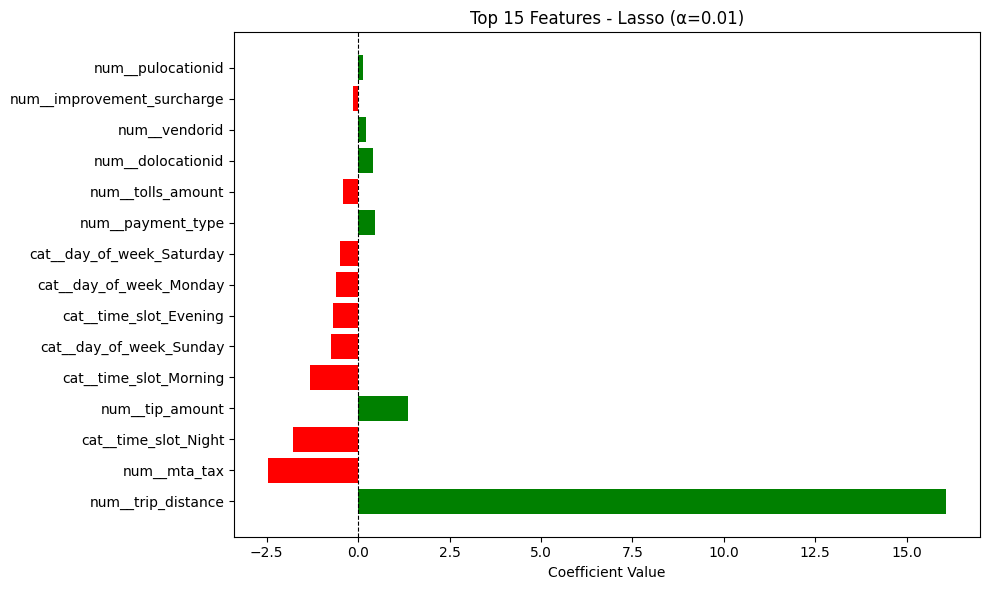


Figure saved: results/figures/tip_prediction/lasso_feature_importance.png


In [36]:
# Get feature names AFTER preprocessing
feature_names = preprocessor.get_feature_names_out()

# Extract Lasso coefficients
coefficients_lasso = best_lasso.named_steps['regressor'].coef_
intercept_lasso = best_lasso.named_steps['regressor'].intercept_

# Verify they match
print(f"Number of features: {len(feature_names)}")
print(f"Number of coefficients: {len(coefficients_lasso)}")

# Now create DataFrame
coef_df_lasso = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients_lasso,
    'Abs_Coefficient': np.abs(coefficients_lasso)
}).sort_values('Abs_Coefficient', ascending=False)

# Features with non-zero coefficients
non_zero_features = coef_df_lasso[coef_df_lasso['Coefficient'] != 0]
excluded_features = coef_df_lasso[coef_df_lasso['Coefficient'] == 0]

print("="*80)
print("TOP 20 MOST IMPORTANT FEATURES (LASSO)")
print("="*80)
print(non_zero_features.head(20)[['Feature', 'Coefficient']].to_string(index=False))

print(f"\n{'='*80}")
print(f"QUESTION 3: FEATURES EXCLUDED BY LASSO")
print(f"{'='*80}")
print(f"Number of features excluded: {len(excluded_features)}/{len(feature_names)}")

if len(excluded_features) > 0:
    print(f"\nExcluded features:")
    for feat in excluded_features['Feature'].tolist()[:20]:
        print(f"  - {feat}")
    if len(excluded_features) > 20:
        print(f"  ... and {len(excluded_features) - 20} more")
else:
    print("No features were excluded (alpha too small for effective regularization)")

# Visualize
plt.figure(figsize=(10, 6))
top_15_lasso = non_zero_features.head(15)
colors = ['green' if x > 0 else 'red' for x in top_15_lasso['Coefficient']]
plt.barh(range(len(top_15_lasso)), top_15_lasso['Coefficient'], color=colors)
plt.yticks(range(len(top_15_lasso)), top_15_lasso['Feature'])
plt.xlabel('Coefficient Value')
plt.title(f'Top 15 Features - Lasso (α={best_alpha})')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig('results/figures/tip_prediction/lasso_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved: results/figures/tip_prediction/lasso_feature_importance.png")

In [37]:
# Save models and data splits
joblib.dump(lr_pipeline, 'models/fare_prediction/linear_regression.pkl')
joblib.dump(best_lasso, 'models/fare_prediction/lasso_regression.pkl')

# Save comparison results
comparison_df.to_csv('results/fare_model_comparison.csv', index=False)

print("="*80)
print("MODELS SAVED")
print("="*80)
print("✓ models/fare_prediction/linear_regression.pkl")
print("✓ models/fare_prediction/lasso_regression.pkl")
print("✓ results/fare_model_comparison.csv")

MODELS SAVED
✓ models/fare_prediction/linear_regression.pkl
✓ models/fare_prediction/lasso_regression.pkl
✓ results/fare_model_comparison.csv


## Exercise 4 Answers - Fare Amount Prediction


## **Question 1: Feature Impact Analysis & Business Recommendations**

### **How features affect fare_amount (from Lasso model results):**

**Most Important Features (by coefficient magnitude):**
1. **trip_distance** (16.08) - By far the strongest predictor of fare amount
2. **mta_tax** (-2.46) - Strong negative impact (regulatory fee)
3. **time_slot_Night** (-1.77) - Night rides have lower base fares
4. **tip_amount** (1.37) - Higher tips correlate with higher fares
5. **time_slot_Morning** (-1.33) - Morning rides have lower base fares
6. **day_of_week_Sunday** (-0.74) - Sunday rides have lower fares
7. **time_slot_Evening** (-0.69) - Evening rides have lower fares
8. **day_of_week_Monday** (-0.60) - Monday rides have lower fares
9. **day_of_week_Saturday** (-0.50) - Saturday rides have lower fares
10. **payment_type** (0.47) - Payment method affects fare calculation

### **Business Recommendations for Taxi Drivers:**

**To Maximize Fare Revenue:**

1. **Focus on Distance-Based Strategy:**
   - **Prioritize long-distance trips** (coefficient: 16.08) - This is the dominant factor
   - Airport runs, cross-borough trips, and suburban destinations
   - One long trip is far more profitable than multiple short trips

2. **Optimal Timing Strategy:**
   - **Best Time Slots:** Afternoon periods (baseline) show highest fare potential
   - **Avoid:** Night (-1.77), Morning (-1.33), and Evening (-0.69) slots for base fare optimization
   - **Best Days:** Tuesday, Wednesday, Thursday (no negative coefficients)
   - **Avoid:** Sunday (-0.74), Monday (-0.60), Saturday (-0.50)

3. **Strategic Insights:**
   - **Trip distance dominates everything else** - focus on longer rides over frequency
   - **Location strategy:** Destination matters more than pickup location (dolocationid: 0.40 vs pulocationid: 0.14)
   - **Passenger count has minimal impact** (0.14) - don't prioritize group rides for fare maximization
   - **Payment type matters** - encourage methods that optimize fare calculation

## **Question 2: Optimal Lambda & Model Performance**

### **Best Hyperparameter:**
- **Optimal λ (alpha) = 0.01** for Lasso regularization

### **Model Comparison with 95% Confidence Intervals:**

| Model | CV R² Mean | CV R² Std | 95% CI | Test R² | Test RMSE | Test MAE |
|-------|------------|-----------|--------|---------|-----------|----------|
| **Linear Regression** | 0.9140 | 0.0176 | [0.8794, 0.9486] | 0.9265 | $4.83 | $2.83 |
| **Lasso Regression** | 0.9140 | 0.0177 | [0.8793, 0.9487] | 0.9268 | $4.82 | $2.84 |

### **Performance Analysis:**
- **Confidence intervals overlap** - no statistically significant difference between models
- Lasso performs marginally better on test set (R² = 0.9268 vs 0.9265)
- Both models explain approximately **91-93% of fare amount variance** - excellent predictive performance
- **Much better performance than tip prediction** (R² ~0.91 vs ~0.56)
- Very low prediction errors: ~$4.82 RMSE, ~$2.84 MAE

## **Question 3: Features Excluded by Lasso**

**Number of features excluded: 0 out of 23 total features**

### **Interpretation:**
- **No features were excluded** by Lasso regularization
- The optimal alpha (0.01) was too small for effective feature elimination
- This suggests **all features contribute meaningfully** to fare prediction
- **Fare prediction is more complex** than tip prediction, requiring all available information
- The model benefits from the full feature set without overfitting

## **Key Business Insights:**

### **Fare vs Tip Strategy Comparison:**

1. **Fare Maximization:**
   - **Distance is king** (16.08 coefficient) - focus on long trips
   - Time slots matter significantly for base fare calculation
   - Much more predictable (R² = 0.91 vs 0.56 for tips)

2. **Strategic Recommendations:**
   - **For consistent income:** Focus on fare optimization (distance-based strategy)
   - **For bonus income:** Apply tip optimization strategies on top of fare-optimized trips
   - **Best overall strategy:** Long-distance trips during afternoon hours on Tuesday-Thursday

3. **Model Reliability:**
   - **Fare prediction is highly reliable** (91% variance explained)
   - Drivers can confidently plan routes and timing based on these insights
   - **Distance-based pricing** makes fare prediction much more accurate than tip prediction

### **Practical Application:**
- **Position near airports, train stations, and business districts** for long-distance opportunities
- **Avoid short local trips** during peak hours - prioritize distance over frequency
- **Tuesday-Thursday afternoons** represent optimal earning periods
- **Weekend and evening strategies** should focus on tip optimization since base fares are lower

The analysis shows that fare prediction is significantly more accurate and reliable than tip prediction, making it a better foundation for business planning and route optimization strategies.
        

---